In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
df = pd.read_csv('combined_data_with_extra_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Sex'] = df['Sex'].str.lower()
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Ruminococcaceae,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,ERR1075960,male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,ERR1854747,male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,ERR688529,male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,ERR1316059,male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,SRR5649200,male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,SRR18576130,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.206897,0.0
1591,SRR18576131,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1592,SRR18576132,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0
1593,SRR18576133,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0


In [3]:
df['Condition'].unique()

array(['Health', 'Parkinsons', 'Alzheimers',
       'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [4]:
df = df.drop(['Run ID', 'Country', 'Age', 'BMI', 'Sex'], axis=1)

In [5]:
df

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Ruminococcaceae,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,Schizophrenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.206897,0.0
1591,Schizophrenia,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1592,Schizophrenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0
1593,Schizophrenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0


In [6]:
dict1 = {'Health': 0,
         'Parkinsons': 1,
         'Alzheimers': 2,
         'Schizophrenia': 3,
         'Epilepsy': 4,
         'Bipolar Disorder': 5,
         'Depression': 6,
         'Bipolar Disorder, Depression, Schizophrenia': 7,
         'Bipolar Disorder, Depression, Epilepsy, Schizophrenia': 8
}

df.loc[:, 'Condition'] = df['Condition'].replace(dict1)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_88747/1325443349.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Condition'] = df['Condition'].replace(dict1)


In [7]:
df

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Ruminococcaceae,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,0,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.206897,0.0
1591,3,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1592,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0
1593,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0


In [8]:
df_label = df['Condition']

In [9]:
df = df.drop(['Condition'], axis=1)

In [10]:
df.columns

Index(['Alistipes', 'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium',
       'Dorea', 'Eubacterium', 'Faecalibacterium', 'Oscillibacter',
       'Parabacteroides', 'Roseburia', 'Ruminococcus', 'Unknown',
       'Coprococcus', 'Lachnospira', 'Oscillospira', 'Subdoligranulum',
       'Sutterella', 'Anaerostipes', 'Streptococcus', 'Akkermansia',
       'Anaerofilum', 'Anaerotruncus', 'Bacillus', 'Barnesiella',
       'Desulfovibrio', 'Dialister', 'Erysipelatoclostridium', 'Holdemania',
       'Intestinibacter', 'Lachnoclostridium', 'Lactobacillus', 'Odoribacter',
       'Prevotella', 'Pseudomonas', 'Sporobacter', 'Ruminiclostridium',
       'Corynebacterium', 'Eggerthella', 'Acinetobacter', 'Parasutterella',
       'Veillonella', 'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       'Anaerobutyricum', 'Escherichia'],
      dtype='object')

In [11]:
df = df.drop(['Unknown', 'Uncultured Organism'], axis=1)

In [12]:
df.columns

Index(['Alistipes', 'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium',
       'Dorea', 'Eubacterium', 'Faecalibacterium', 'Oscillibacter',
       'Parabacteroides', 'Roseburia', 'Ruminococcus', 'Coprococcus',
       'Lachnospira', 'Oscillospira', 'Subdoligranulum', 'Sutterella',
       'Anaerostipes', 'Streptococcus', 'Akkermansia', 'Anaerofilum',
       'Anaerotruncus', 'Bacillus', 'Barnesiella', 'Desulfovibrio',
       'Dialister', 'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Ruminococcaceae', 'Phocaeicola', 'Paraprevotella', 'Tidjanibacter',
       'Flavonifractor', 'Mediterraneibacter', 'Agathobacter',
       'Ligilactobacillus', 'Anaerobutyricum', 'Escherichia'],
      dtype='object')

In [13]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [14]:
df = df.drop(['Ruminococcaceae'], axis=1)

In [15]:
df_columns = df.columns
df_columns

Index(['Alistipes', 'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium',
       'Dorea', 'Eubacterium', 'Faecalibacterium', 'Oscillibacter',
       'Parabacteroides', 'Roseburia', 'Ruminococcus', 'Coprococcus',
       'Lachnospira', 'Oscillospira', 'Subdoligranulum', 'Sutterella',
       'Anaerostipes', 'Streptococcus', 'Akkermansia', 'Anaerofilum',
       'Anaerotruncus', 'Bacillus', 'Barnesiella', 'Desulfovibrio',
       'Dialister', 'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Phocaeicola', 'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       'Anaerobutyricum', 'Escherichia'],
      dtype='object')

In [16]:
df

,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,...,Veillonella,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,0.017305,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,0.010005,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,0.003887,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,0.042310,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,0.023199,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.206897,0.0
1591,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0
1593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0


In [17]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df) 

In [18]:
print("Explained variance ratio by each component:", pca.explained_variance_ratio_)
print("Total explained variance from the first three components:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio by each component: [0.41198051 0.09456417 0.07960106]
Total explained variance from the first three components: 0.586145740761239


In [19]:
shape = pca.components_.shape[0]
feature_names = df_columns

most_important = [np.abs(pca.components_[i]).argmax() for i in range(shape)]

most_important_names = [feature_names[most_important[i]] for i in range(shape)]

dictionary = {'PC{}'.format(i): most_important_names[i] for i in range(shape)    
}

important_df = pd.DataFrame(dictionary.items())
important_df


,0,1
0,PC0,Bacteroides
1,PC1,Prevotella
2,PC2,Faecalibacterium


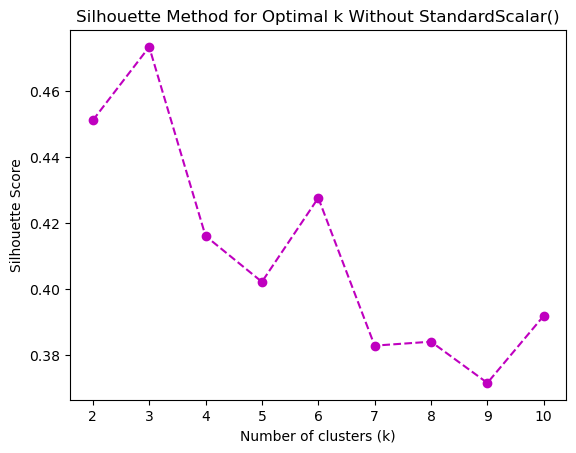

In [20]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', c='m')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k Without StandardScalar()")
#plt.savefig('sil_without_standardscalar.jpg')
plt.show()


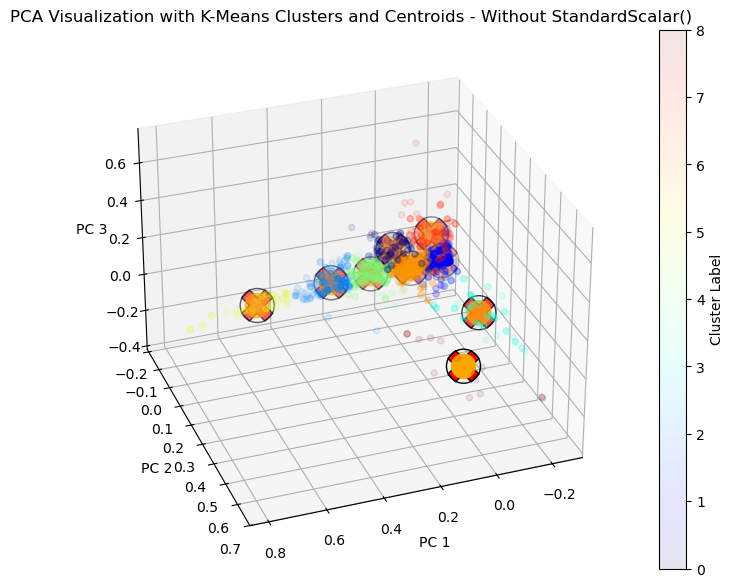

In [31]:
kmeans1 = KMeans(n_clusters=9, random_state=42)
cluster_labels1 = kmeans1.fit_predict(X_pca)
centroids = kmeans1.cluster_centers_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=cluster_labels1, cmap='jet', alpha=0.1)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', marker='X', s=500, label="Centroids", edgecolors='black')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='orange', marker='o', s=300, label="Centroids (Layer 2)")
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           edgecolors='black', facecolors='none', marker='o', s=600, label="Centroids (Layer 3)")


plt.colorbar(scatter, label="Cluster Label")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("PCA Visualization with K-Means Clusters and Centroids - Without StandardScalar()")
ax.view_init(elev=30, azim=70)

#plt.savefig('k=9_cent_noss.jpg')
plt.show()

# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_label, cmap='jet', alpha=0.7)
# plt.colorbar(scatter, label="Digit Label")
# plt.title("PCA Visualization of Digits Dataset")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()


In [22]:
score = silhouette_score(X_pca, cluster_labels1)
print("Silhouette Score (K-means):", score)

ari = adjusted_rand_score(df_label, cluster_labels1)
print("Adjusted Rand Index (K-means): ", ari)

nmi = normalized_mutual_info_score(df_label, cluster_labels1)
print("Normalized Mutual Information (K-means): ", nmi)

Silhouette Score (K-means): 0.3844519181598884
Adjusted Rand Index (K-means):  0.011325299842002822
Normalized Mutual Information (K-means):  0.10566180768717398


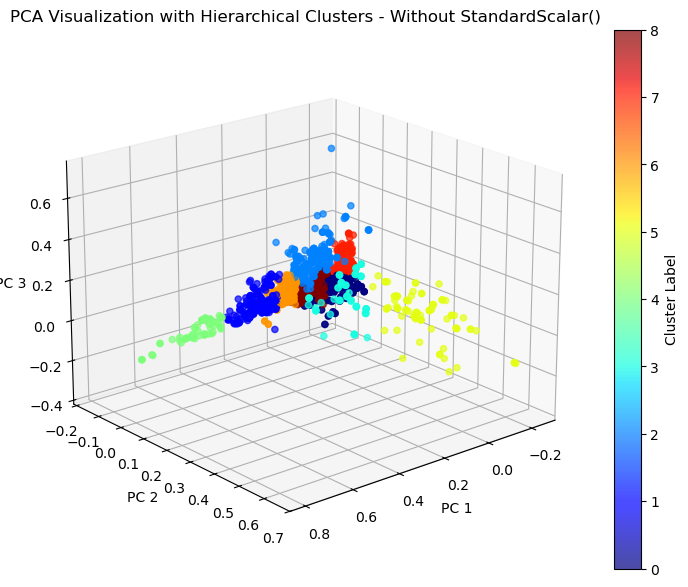

In [36]:
hierarchical = AgglomerativeClustering(n_clusters=9)
cluster_labels_hierarchical = hierarchical.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=cluster_labels_hierarchical, cmap='jet', alpha=0.7)

plt.colorbar(scatter, label="Cluster Label")

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("PCA Visualization with Hierarchical Clusters - Without StandardScalar()")
ax.view_init(elev=20, azim=50)

#plt.savefig('k=9_hier_noss.jpg')

plt.show()

In [24]:
score2 = silhouette_score(X_pca, cluster_labels_hierarchical)
print("Silhouette Score (Hier.): ",score2)
ari2 = adjusted_rand_score(df_label, cluster_labels_hierarchical)
print("Adjusted Rand Index (Hier.): ", ari2)
nmi2 = normalized_mutual_info_score(df_label, cluster_labels_hierarchical)
print("Normalized Mutual Information (Hier.): ",nmi2)

Silhouette Score (Hier.):  0.30986398611475724
Adjusted Rand Index (Hier.):  0.0017529802511610218
Normalized Mutual Information (Hier.):  0.09271256576395098


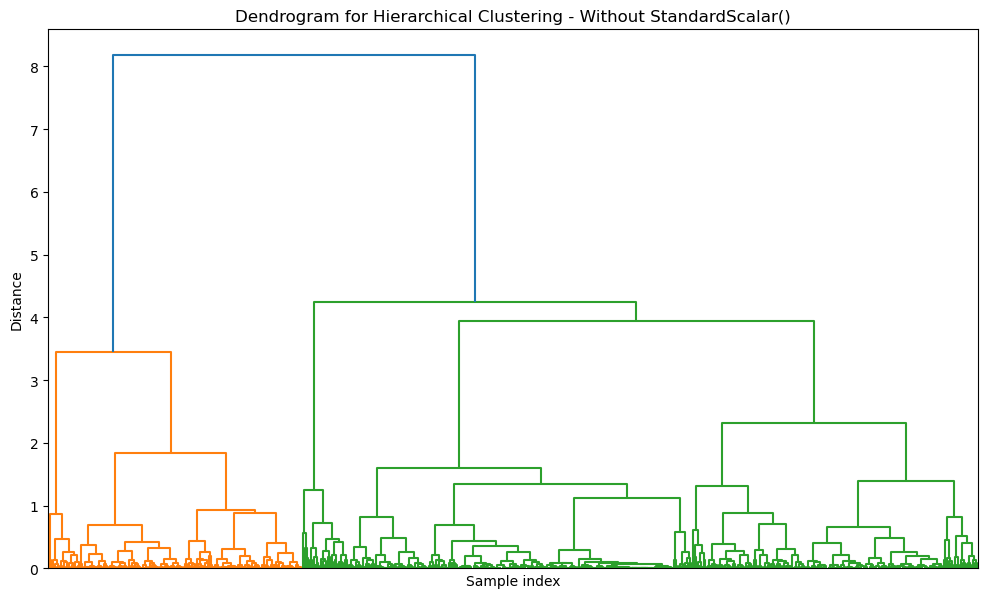

In [25]:
Z = linkage(X_pca, 'ward')

plt.figure(figsize=(12, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering - Without StandardScalar()")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.xticks([])
#plt.savefig('k=3_dend_noss.jpg')
plt.show()

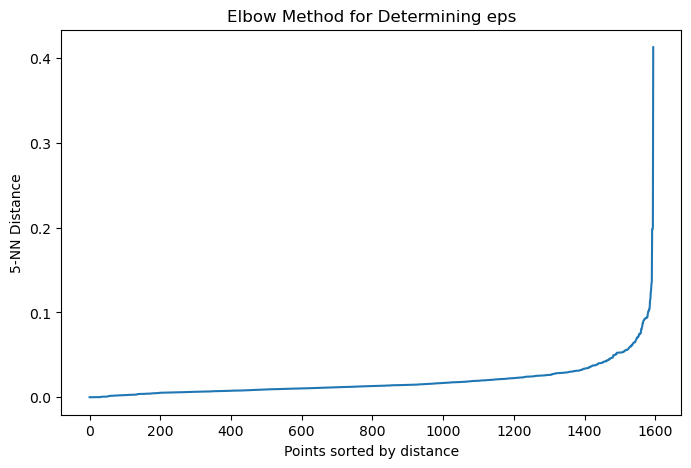

In [38]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Choose k = min_samples (typically ~4-5)
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

# Sort the distances (only take the k-th distance for each point)
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("Elbow Method for Determining eps")
plt.show()


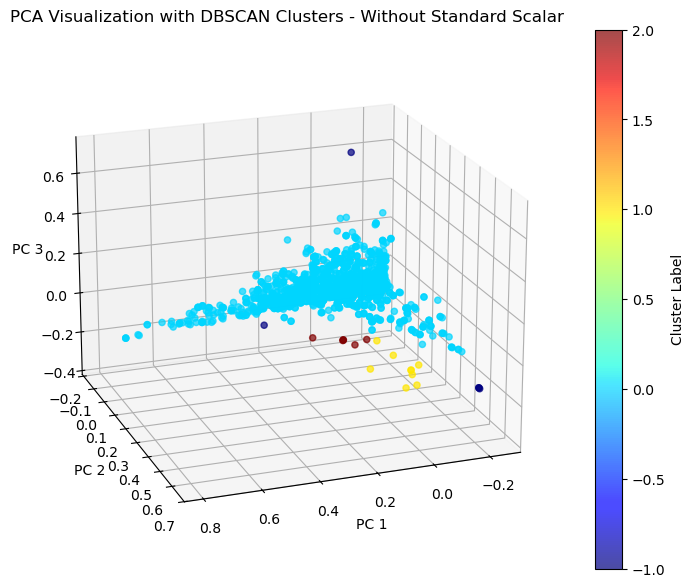

In [57]:
dbscan = DBSCAN(eps=0.1, min_samples=5) 
cluster_labels_dbscan = dbscan.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=cluster_labels_dbscan, cmap='jet', alpha=0.7)

plt.colorbar(scatter, label="Cluster Label")

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("PCA Visualization with DBSCAN Clusters - Without Standard Scalar")
ax.view_init(elev=20, azim=70)

#plt.savefig('dbscan_noss.jpg')

plt.show()
